In [1]:
# load library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.model_selection import train_test_split # import fungsi trai_test_split
from sklearn import metrics # import scikit-learn metrics module for accuracycalculation

In [2]:
# load dataset
col_names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline','Type']
dataset = pd.read_csv('wine_dataset.csv', header=None, names=col_names)

In [3]:
### Mengambil semua data untuk percobaan
data = dataset.loc [1:150,'Alcohol':'Type']
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Type
1,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
2,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0,One
3,13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185.0,One
4,14.37,1.95,2.5,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0,One
5,13.24,2.59,2.87,21.0,118.0,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [4]:
# split dataset in features and target variabel
feature_cols = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
x = data[feature_cols] # feature
y = data.Type # target variabel

In [5]:
# split dataset menjadi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=1) # 70% training dan 30% test secara acak

In [6]:
# create decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# train decision tree classifier
clf = clf.fit(x_train, y_train)

# predict the response for dataset
y_pred = clf.predict(x_test)

In [7]:
# model accuracy
print ("Akurasi :",metrics.accuracy_score(y_test,y_pred)*100,"%")

Akurasi : 97.77777777777777 %


In [8]:
# tampilan prediksi
df = pd.DataFrame({'Actual':y_test,'Prediksi':y_pred})
print (df)

    Actual Prediksi
15     One      One
99     Two      Two
76     Two      Two
17     One      One
132  Three    Three
57     One      One
142  Three    Three
45     One      One
30     One      One
121    Two      Two
95     Two      Two
6      One      One
103    Two      Two
52     One      One
79     Two      Two
43     One      One
93     Two      Two
67     Two      Two
32     One      One
36     One      One
91     Two      Two
85     Two      Two
78     Two      Two
41     One      One
126    Two      Two
100    Two      Two
34     One      One
20     One      One
74     Two      One
147  Three    Three
92     Two      Two
136  Three    Three
70     Two      Two
129    Two      Two
115    Two      Two
49     One      One
54     One      One
29     One      One
55     One      One
109    Two      Two
113    Two      Two
18     One      One
120    Two      Two
104    Two      Two
59     One      One


In [9]:
# visualisasi decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

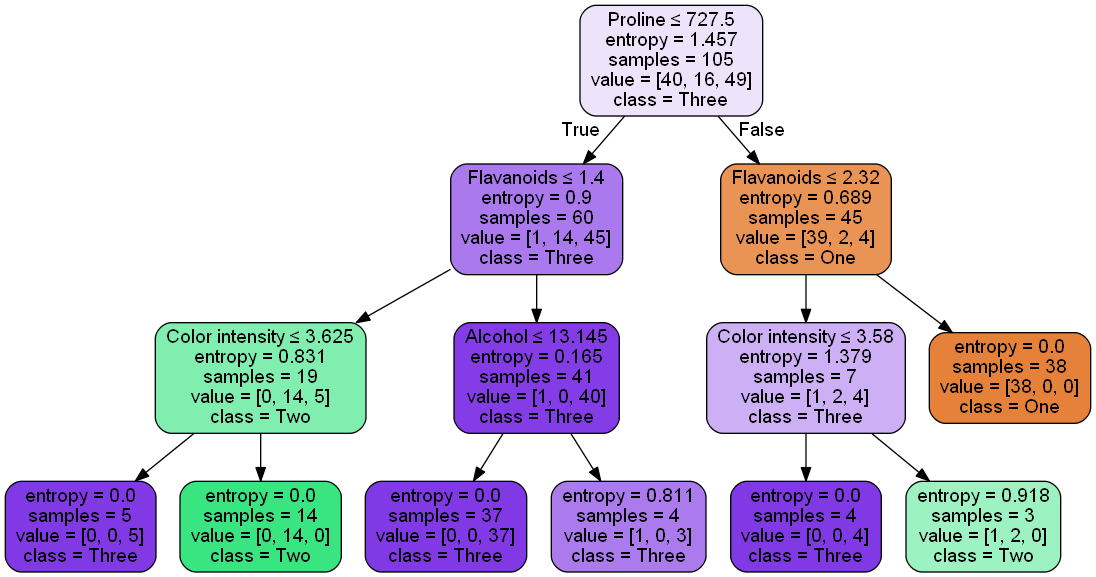

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['One','Two','Three'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())